Using SVM algorithm, predict if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Use the following kernel for the SVM algorithm:
a) Linear 	b) Polynomial 		c) RBF 	d) Sigmoid
Find the following metrics for each of the SVM algorithms:
1) Accuracy 		2) Recall 		3) Precision 			4) F1-Score
5) Jaccard Score 	6) Error rates		7) Confusion Matrix
Compare all four SVM models using an ROC curve.


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, confusion_matrix, roc_curve, auc

In [3]:
data = pd.read_csv('samples_cancer.csv')
data = data.replace('?', pd.NA)
data = data.dropna()
data['BareNuc'] = pd.to_numeric(data['BareNuc'])

print("Data loaded and cleaned successfully.")

Data loaded and cleaned successfully.


In [4]:
X = data.drop(['ID', 'Class'], axis=1)
y = data['Class'].map({2:0, 4:1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
roc_data = {}

for kernel_name in kernels:
    print(f"--- SVM with {kernel_name.upper()} Kernel ---")

    # 1. Create and Train Model
    # We must set probability=True to use predict_proba for the ROC curve
    model = svm.SVC(kernel=kernel_name, probability=True, random_state=42)
    model.fit(X_train_scaled, y_train)

    # 2. Make Predictions
    y_pred = model.predict(X_test_scaled)

    # 3. Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    error_rate = 1 - acc
    cm = confusion_matrix(y_test, y_pred)

    # 4. Print Metrics
    print(f"1) Accuracy: {acc:.4f}")
    print(f"2) Recall: {rec:.4f}")
    print(f"3) Precision: {prec:.4f}")
    print(f"4) F1-Score: {f1:.4f}")
    print(f"5) Jaccard Score: {jaccard:.4f}")
    print(f"6) Error Rate: {error_rate:.4f}")
    print("7) Confusion Matrix:")
    print(cm)

    # 5. Get data for ROC Curve
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store data for the final plot
    roc_data[kernel_name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    print("-" * 30 + "\n")

--- SVM with LINEAR Kernel ---
1) Accuracy: 0.9708
2) Recall: 0.9483
3) Precision: 0.9821
4) F1-Score: 0.9649
5) Jaccard Score: 0.9322
6) Error Rate: 0.0292
7) Confusion Matrix:
[[78  1]
 [ 3 55]]
------------------------------

--- SVM with POLY Kernel ---
1) Accuracy: 0.9197
2) Recall: 0.8103
3) Precision: 1.0000
4) F1-Score: 0.8952
5) Jaccard Score: 0.8103
6) Error Rate: 0.0803
7) Confusion Matrix:
[[79  0]
 [11 47]]
------------------------------

--- SVM with RBF Kernel ---
1) Accuracy: 0.9635
2) Recall: 0.9483
3) Precision: 0.9649
4) F1-Score: 0.9565
5) Jaccard Score: 0.9167
6) Error Rate: 0.0365
7) Confusion Matrix:
[[77  2]
 [ 3 55]]
------------------------------

--- SVM with SIGMOID Kernel ---
1) Accuracy: 0.9562
2) Recall: 0.9310
3) Precision: 0.9643
4) F1-Score: 0.9474
5) Jaccard Score: 0.9000
6) Error Rate: 0.0438
7) Confusion Matrix:
[[77  2]
 [ 4 54]]
------------------------------



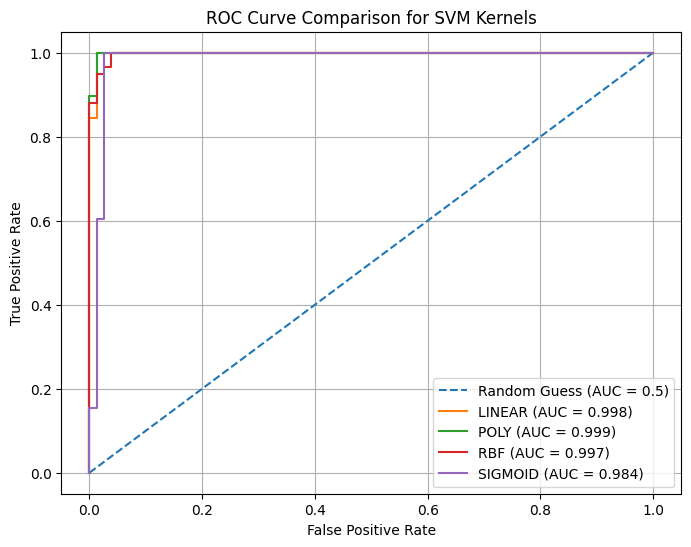

In [7]:
plt.figure(figsize=(8, 6))

# Plot the "random guess" line
plt.plot([0, 1], [0, 1], '--', label='Random Guess (AUC = 0.5)')

# Plot each SVM kernel's ROC curve
for kernel_name, data in roc_data.items():
    label = f"{kernel_name.upper()} (AUC = {data['auc']:.3f})"
    plt.plot(data['fpr'], data['tpr'], label=label)

# Add labels and title
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()